In [7]:
#Code to get the tweeter data, get the url, copy the pin and paste here.
import tweepy
import webbrowser
import time
cosumer_key = "vQOWNASyo8XuilBewBdKISyVE"
consumer_secret = "TCJeRSk2R1HpK0Fx3PDrYfvuezuGUYLfG7yiwtYjykcTskIysF"
callback_url = 'oob' # URL : https://
auth = tweepy.OAuthHandler(cosumer_key, consumer_secret, callback_url)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin number? ")
user_pin_input
auth.get_access_token(user_pin_input)
print(auth.access_token, auth.access_token_secret)
api = tweepy.API(auth)
me = api.me()
print(me.screen_name)

https://api.twitter.com/oauth/authorize?oauth_token=HC_b2AAAAAABOBRfAAABeSqo1bI
What's the pin number? 1130826
422268986-l2D9HR2hQg0nS9ZQmKiLVCAeFG7iiLKpUCGuFbNq FNcBeD3b1fsa9HGHg7DOwVsuVKQIP6QiONU7CeH5y5MIK
Rakesh_Singh01


In [8]:
#Get the tweeter data for any of the company and store line by line code into a variable/file
import nltk
import pandas as pd
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
stock='Moderna'
q=stock
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
#Code to get limited nymber of tweets
tweets = tweepy.Cursor(api.search,
                   q='Moderna',
                   lang="en",
                   since='2020-11-01').items(2000)

#print(type(tweets))
# Remove URLs
#Blank dataframe to store results
df4 = pd.DataFrame()

tweets_list = []
score_list=[]
prediction_list=[]

#Get each tweet and analyze the sentiment
for tweet in tweets:
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
        sen=SentimentIntensityAnalyzer()
        sa=sen.polarity_scores(tweet.text)
        print(sa)
        '''
        if sa["pos"] > sa["neg"]:
            prediction = "Positive"
            score = prediction+":" +str(sa["pos"])
        else:
            prediction = "Negative"
            score = prediction+ ":"+str(sa["neg"])'''
        #Logic for Buy,sell, Hold : If Positive=Buy, Negative=Sell, Neutral=Hold
        if sa["compound"]>= 0.05:
            prediction="Positive"
            score = prediction+":" +str(sa["compound"])
            
        elif sa["compound"]<= -0.05:
            prediction="Negative"
            score = prediction+":" +str(sa["compound"])
        else:
            prediction="Neutral"
            score = prediction+":" +str(sa["compound"])
        
        #print(sa)
        #mod = sa + tweet.text
        score_list.append(score)
        #tweets_list.append(sa)
        tweets_list.append(tweet.text)
        prediction_list.append(prediction)
        
        #Store each tweets sentiment score in a dataframe
        df4 = df4.append(pd.Series([score,tweet.text,prediction,tweet.created_at,q],index=['Score','Tweet','Prediction','CreatedDate','CompanyName']), ignore_index=True)
        

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rakeshmac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.5242}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6808}
{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.149, 'neu': 0.736, 'pos': 0.115, 'compound': -0.1889}
{'neg': 0.145, 'neu': 0.746, 'pos': 0.11, 'compound': -0.2023}
{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'compound': -0.6142}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.5093}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.107, 'neu': 0.829, 'pos': 0.063, 'compound': -0.2263}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

{'neg': 0.293, 'neu': 0.621, 'pos': 0.086, 'compound': -0.7901}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.183, 'neu': 0.546, 'pos': 0.27, 'compound': 0.4976}
{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.5267}
{'neg': 0.146, 'neu': 0.641, 'pos': 0.213, 'compound': 0.2244}
{'neg': 0.102, 'neu': 0.776, 'pos': 0.122, 'compound': -0.128}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.103, 'neu': 0.712, 'pos': 0.185, 'compound': 0.3167}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423}
{

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}
{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.422, 'neu': 0.578, 'pos': 0.0, 'compound': -0.6571}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.5255}
{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.6808}
{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.0, 'neu': 0.8

{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.6809}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.5777}
{'neg': 0.282, 'neu': 0.545, 'pos': 0.173, 'compound': -0.296}
{'neg': 0.391, 'neu': 0.531, 'pos': 0.078, 'compound': -0.876}
{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.6478}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.129, 'neu': 0.691, 'pos': 0.18, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.7783}
{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.6458}
{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.7906}
{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.228}
{'neg': 0.153, 'neu': 0.723, 'pos': 0.123, 'compound': 0.0772}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.784}
{'neg': 0.074, 'neu': 0.769, 'pos': 0.157, 'compound': 0.3566}
{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.134, 'neu': 0.783, 'pos': 0.083, 'compound': -0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.063, 'neu': 0.748, 'pos': 0.189, 'compound': 0.4939}
{'neg': 0.211, 'neu': 0.569, 'pos': 0.22, 'compound': 0.0258}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0

In [9]:
df4.to_csv(r'Moderna.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)
print(df4)

    CompanyName         CreatedDate Prediction             Score  \
0       Moderna 2021-05-02 01:21:00   Positive   Positive:0.5242   
1       Moderna 2021-05-02 01:20:37    Neutral       Neutral:0.0   
2       Moderna 2021-05-02 01:20:14   Positive   Positive:0.7096   
3       Moderna 2021-05-02 01:20:12   Positive   Positive:0.6808   
4       Moderna 2021-05-02 01:20:06   Negative  Negative:-0.3818   
..          ...                 ...        ...               ...   
709     Moderna 2021-05-01 23:16:04    Neutral       Neutral:0.0   
710     Moderna 2021-05-01 23:16:00    Neutral       Neutral:0.0   
711     Moderna 2021-05-01 23:15:54   Positive   Positive:0.4939   
712     Moderna 2021-05-01 23:15:52    Neutral       Neutral:0.0   
713     Moderna 2021-05-01 23:15:38   Positive   Positive:0.7783   

                                                 Tweet  
0    @ThomasSanders Woot! Way to go! My 2nd Moderna...  
1         @Frankvdb1971 None from Moderna, both shots.  
2    Got my 

<ipython-input-9-e75c3a83f625>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df4.to_csv(r'Moderna.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)


In [10]:
# Calculate the average of prediction to display the result
#df4 = pd.read_csv(r'Moderna.csv')
cntPrediction=df4['Prediction'].count()
print(cntPrediction)

714


In [11]:
cntPositive=list(df4.Prediction).count('Positive')
cntNegative=list(df4.Prediction).count('Negative')
cntNeutral=list(df4.Prediction).count('Neutral')
percentPositive=(cntPositive/cntPrediction)*100
percentNegative=(cntNegative/cntPrediction)*100
percentNeutral=(cntNeutral/cntPrediction)*100
print("Buy% = ", percentPositive)
print("Sell% = ", percentNegative)
print("Hold% = ", percentNeutral)

Buy% =  33.61344537815126
Sell% =  25.350140056022408
Hold% =  41.03641456582633


In [12]:
# Download the helper library from https://www.twilio.com/docs/python/install
import os
from twilio.rest import Client


# Your Account Sid and Auth Token from twilio.com/console
# and set the environment variables. See http://twil.io/secure
#account_sid = os.environ['AC2021d083d53ba956203c588ab4ff9c9b']
#auth_token = os.environ['66f965a306e5f153bca93d0bcf44e014']
account_sid = 'AC2021d083d53ba956203c588ab4ff9c9b'
auth_token = '66f965a306e5f153bca93d0bcf44e014'
client = Client(account_sid, auth_token)
analysis = 'Stock='+str(q) + ' Buy%='+ str(percentPositive) + ' Sell%=' + str(percentNegative) + ' Hold%=' + str(percentNeutral)
#body = 'Buy=%d Sell=%d Hold=%d'
message = client.messages.create(
                              body=analysis,
                              from_='+13142549333',
                              to='+12024289119'
                          )

print(message.sid)
print(message)

SMee1f34596d984b95b00780ec1e45974e
<Twilio.Api.V2010.MessageInstance account_sid=AC2021d083d53ba956203c588ab4ff9c9b sid=SMee1f34596d984b95b00780ec1e45974e>


In [13]:
#Create a dataframe to plot graphs
df_modernagraph=pd.DataFrame([[q,percentPositive,percentNegative,percentNeutral]],columns=['CompanyName','Buy','Sell','Hold'])
print(df_modernagraph)

  CompanyName        Buy      Sell       Hold
0     Moderna  33.613445  25.35014  41.036415


<AxesSubplot:>

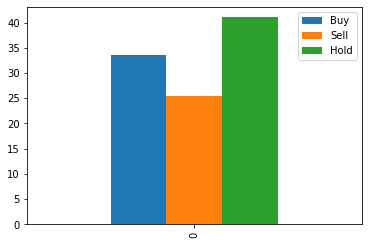

In [14]:
df_modernagraph.plot.bar()